## PHASE 2 PROJECT.
### GROUP 2.
#### Members





#### Business Problem.
Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.


From a pool of Objectives offer three solid recommendations to the firm.

### Objectives.
1. Understand runtime trends considering ratings. ( GODFREY)
2. Potential movie directors that have the highest audience ratings. (JOY)
3. Studios with the highest returns. (JOY)
4. Production budget that yields the most profit return and Evaluate the Impact of Budget on Success. (Godfrey)
5. Compare between the worldwide and domestic patterns which one has more profitable market. (Emmanuel)
6. Understand Genre Performance in terms of ratings (Faith)
7. Identify Profitable Films. (Faith)
8. Find Seasonal or Time-Based Trends (Emmanuel)


### Import necessary Libraries.

In [100]:
#Import necessary libraries.

import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
# Create a connection to the database `im.db`
conn = sqlite3.connect('Data/im.db')
# Create a  Cursor to execute SQL statements and fetch results from SQL queries
cur = conn.cursor()

In [102]:
# This query returns a tuple containing the table’s names
for row in cur.execute("SELECT name FROM sqlite_master"):
  print(row)

('movie_basics',)
('directors',)
('known_for',)
('movie_akas',)
('movie_ratings',)
('persons',)
('principals',)
('writers',)


### LOAD THE DATA

In [103]:
df_Imdb = pd.read_sql("SELECT * FROM movie_basics",conn)
df_Imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [104]:
df_Bom = pd.read_csv('Data/bom.movie_gross.csv')
df_Bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [105]:
df_Tn = pd.read_csv('Data/tn.movie_budgets.csv')
df_Tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [106]:
df_tmdb = pd.read_csv('Data/tmdb.movies.csv')
df_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [107]:
df_RtMovieInfo = pd.read_csv("Data/rt.movie_info.tsv", sep="\t")
df_RtMovieInfo.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


## CLEANING THE DATA.


In [108]:
#Cleaning the data.

#Check for missing values in the Bom Data.
print(df_Bom.columns)
print(df_Bom.info())
print(df_Bom.shape)
df_Bom.isna().sum()

#Put the missing values in percentage.
df_Bom.isna().sum()/df_Bom.shape[0]*100

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None
(3387, 5)


title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

In [109]:
#Replace null in studio with 'Unknown'
df_Bom['studio'].fillna('Unknown', inplace=True)

#Drop the null values in the domestic gross column.
df_Bom.dropna(subset=['domestic_gross'], inplace=True)

#Dull the null values in the foreign gross column.
df_Bom.dropna(subset=['foreign_gross'], inplace=True)

#Check for missing values in the Bom Data again.
df_Bom.isna().sum()/df_Bom.shape[0]*100

title             0.0
studio            0.0
domestic_gross    0.0
foreign_gross     0.0
year              0.0
dtype: float64

In [ ]:
#Check the df_RtMovieInfo Data.

#The columns in the df_RtMovieInfo Data.
print(df_RtMovieInfo.columns)
print(df_RtMovieInfo.info())

#Drop the unnecessary columns.
df_RtMovieInfo.drop(['theater_date','synopsis','dvd_date','currency','box_office','studio'], axis=1, inplace=True)

#The number of rows in the df_RtMovieInfo Data.
print(df_RtMovieInfo.shape)

#Get the null values in the df_RtMovieInfo Data.
df_RtMovieInfo.isna().sum()

#Drop null values.
df_RtMovieInfo.dropna(subset=['rating','genre','director','runtime','writer'], inplace=True)

#Check the null values in the df_RtMovieInfo Data again.
df_RtMovieInfo.isna().sum()


Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
None
(1560, 6)


id          0
rating      0
genre       0
director    0
writer      0
runtime     0
dtype: int64

In [111]:
#Check the Data df_Tn

#Get the columns and the info in the df_Tn Data.
print(df_Tn.columns)
print(df_Tn.info())

#Get the number of rows in the df_Tn Data.
print(df_Tn.shape)

#Get the null values in the df_Tn Data.
df_Tn.isna().sum()

#The data has no null values.

#Remove the $ and , from the gross and budget columns.
df_Tn['production_budget'] = df_Tn['production_budget'].replace('[\$,]', '', regex=True).astype(float)
df_Tn['worldwide_gross'] = df_Tn['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)
df_Tn['domestic_gross'] = df_Tn['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)


Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None
(5782, 6)


In [112]:
#Check the Data df_tmdb.
#The columns and the info in the df_tmdb Data.
print(df_tmdb.columns)
print(df_tmdb.info())

#Get the number of rows in the df_tmdb Data.
print(df_tmdb.shape)

#Get the null values in the df_tmdb Data.
df_tmdb.isna().sum()

#The data has no null values.

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
None
(26517, 10)


Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

### ANALYSIS, CONCLUSIONS AND RECOMMENDATIONS

In [113]:
### OBJECTIVE 1. 

#Understand runtime trends considering ratings.

# Load necessary tables into pandas DataFrames
movie_basics = pd.read_sql_query("SELECT movie_id, primary_title, genres, runtime_minutes FROM movie_basics", conn)
movie_ratings = pd.read_sql_query("SELECT movie_id, averagerating FROM movie_ratings", conn)

# Merge the tables on 'movie_id'
movies = pd.merge(movie_basics, movie_ratings, on='movie_id')

# Drop rows with missing values
movies = movies.dropna(subset=['genres', 'runtime_minutes', 'averagerating'])

# Split genres and explode the DataFrame
movies['genres'] = movies['genres'].str.split(',')
movies_exploded = movies.explode('genres')

# Calculate the number of movies per genre
genre_distribution = movies_exploded['genres'].value_counts().reset_index()
genre_distribution.columns = ['Genre', 'Movie Count']

print("Genre Distribution:")
print(genre_distribution.head(10))


Genre Distribution:
         Genre  Movie Count
0        Drama        28394
1  Documentary        16423
2       Comedy        15514
3     Thriller         7583
4       Horror         6917
5       Action         6297
6      Romance         5976
7        Crime         4338
8    Biography         3693
9    Adventure         3621


In [114]:
# Group by runtime and calculate average rating
runtime_performance = movies.groupby('runtime_minutes')['averagerating'].mean().reset_index()

# Sort by average rating
runtime_performance = runtime_performance.sort_values(by='averagerating', ascending=False)

print("Average Rating by Runtime:")
print(runtime_performance.head(10))


Average Rating by Runtime:
     runtime_minutes  averagerating
280            607.0           9.30
269            379.0           9.20
270            383.0           9.20
239            261.0           9.00
286           1440.0           8.90
273            467.0           8.90
231            247.0           8.85
203            207.0           8.80
268            364.0           8.70
249            287.0           8.70


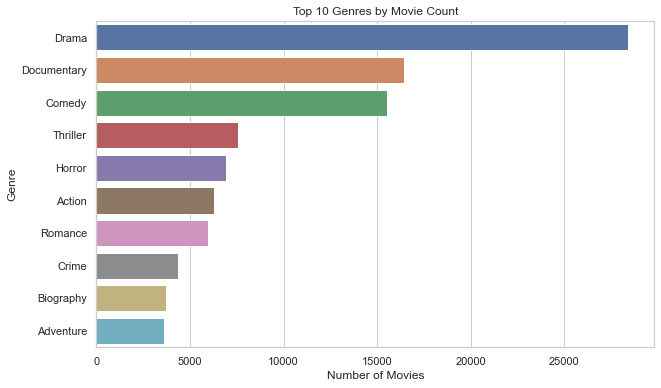

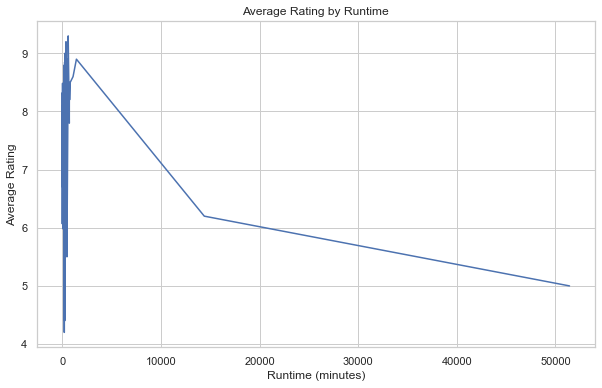

In [115]:
# Plotting the results.
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot genre distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Movie Count', y='Genre', data=genre_distribution.head(10))
plt.title('Top 10 Genres by Movie Count')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

# Plot average rating by runtime
plt.figure(figsize=(10, 6))
sns.lineplot(x='runtime_minutes', y='averagerating', data=runtime_performance)
plt.title('Average Rating by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.show()

### Recccomendation.
The attributes used to evaluate movie perfomance and ratings include the run time in minutes and the movie popularity using movie count.

It is advisable for the movie studio to highly consider venturing into movies with shorter run time as the longer the periods the lower the ratings as shown above.

It is also advisable for the movie studio to venture into genres such as Dramas and Documentaries as from the analysis above, these genres earned the spot as the most popular genres over others such as Adventures, Biographies and Crime movies.

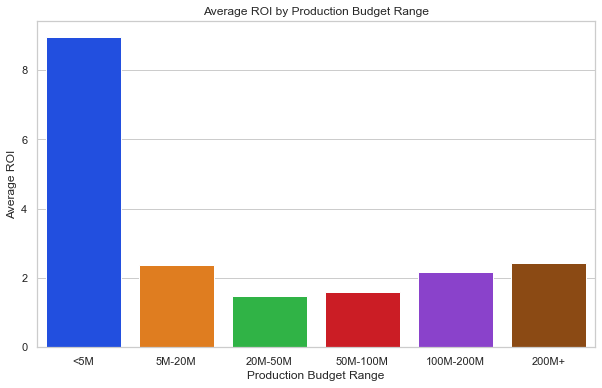

In [116]:
# 0BJECTIVE 4.
#Production budget that yields the most profit return and Evaluate the Impact of Budget on Success.

# Calculate ROI to guide budget allocation
df_Tn['ROI'] = (df_Tn['worldwide_gross'] - df_Tn['production_budget']) / df_Tn['production_budget']

# Create Budget Bins
budgetBins = [0, 5000000, 20000000, 50000000, 100000000, 200000000, 500000000]
budgetLabels = ['<5M', '5M-20M', '20M-50M', '50M-100M', '100M-200M', '200M+']
df_Tn['budget_bin'] = pd.cut(df_Tn['production_budget'], bins=budgetBins, labels=budgetLabels)

# Group and Plot
budgetRoi = df_Tn.groupby('budget_bin')['ROI'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='budget_bin', y='ROI', data=budgetRoi, palette="bright")
plt.title('Average ROI by Production Budget Range')
plt.xlabel('Production Budget Range')
plt.ylabel('Average ROI')
plt.show()

 


### Reccomendation.

The analysis above used the budget and worldwide gross to find the returns on the movies produced by various studios. 
From the analysis, we came to a conclusion that the movies with the lowest budgets recorded higher returns.
This therefore means that for the studio to gain high returns it is not necessary for them to spend a lot in production as less budgets produce higher returns